## Sleep Summary Stats <a class="anchor" id="sleep-summary-stats"></a>

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# data_dir = '/Volumes/schnyer/Megan/Wearables/data/'
data_dir = '/Users/mcmahonmc/Library/CloudStorage/Box-Box/CogNeuroLab/Wearables/data/'
results_dir = '/Users/mcmahonmc/Library/CloudStorage/Box-Box/CogNeuroLab/Wearables/results/'

In [181]:
# df = pd.read_csv(data_dir + 'sleeptime_efficiency_device.csv')
df = pd.read_csv('/Volumes/schnyer/Megan/Wearables_old/data/dataset_2021_07_19.csv')
# df = pd.read_csv('/Users/mcmahonmc/Library/CloudStorage/Box-Box/CogNeuroLab/Wearables/data/sleep_stats.csv')
# df = df[~df.index.isin(exclude)]
df = df.dropna(axis=1, how='all')
df.head()

,subject,redcap_id,age_group,handedness,actiwatch_arm,fitbit_device,dominant,join_date,start_date_act,interval_number_act,...,onset_latency_fit,time_in_bed_fit,awake_duration_fit,wake_time_fit,sleep_duration_act_manual,sleep_duration_fit_manual,tdif,joinid,lag_time,arm
0,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-25,10/24/2019,1.0,...,0.0,556.0,4.0,2019-10-25 05:19:00,552.0,508.0,4.0,10011 2019-10-25,NaN,1
1,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-26,10/25/2019,2.0,...,NaN,NaN,NaN,NaN,482.0,NaN,NaN,10011 2019-10-26,1.0,1
2,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-27,10/26/2019,3.0,...,NaN,NaN,NaN,NaN,538.5,NaN,NaN,10011 2019-10-27,1.0,1
3,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-28,10/28/2019,4.0,...,NaN,NaN,NaN,NaN,340.0,NaN,NaN,10011 2019-10-28,1.0,1
4,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-29,10/28/2019,5.0,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,10011 2019-10-29,1.0,1


In [280]:
dfg = df.groupby(['subject', 'age_group']).mean().reset_index()
dfg

,subject,age_group,redcap_id,interval_number_act,sleep_duration_act,total_ac_act,percent_invalid_sw_act,onset_latency_act,efficiency_act,percent_wake_act,...,efficiency_fit,sleep_duration_fit,onset_latency_fit,time_in_bed_fit,awake_duration_fit,sleep_duration_act_manual,sleep_duration_fit_manual,tdif,lag_time,arm
0,10011,Young Adults,11.0,7.384615,457.076923,6425.923077,0.0,10.769231,88.388462,8.914615,...,91.600000,443.200000,0.000000,484.200000,5.400000,461.692308,443.200000,55.800000,1.086806,1.0
1,10012,Young Adults,12.0,7.000000,514.423077,7361.923077,0.0,23.269231,83.135385,9.724615,...,92.428571,468.142857,0.000000,509.000000,5.285714,514.423077,468.142857,10.571429,1.000000,1.0
2,10014,Young Adults,14.0,7.500000,587.791667,6720.583333,0.0,9.750000,86.694167,7.425833,...,95.285714,406.428571,0.000000,427.714286,3.857143,587.791667,406.428571,72.333333,1.000000,1.0
3,10016,Young Adults,16.0,7.153846,423.307692,10490.000000,0.0,9.269231,76.519231,15.742308,...,90.375000,365.375000,0.000000,403.875000,3.750000,423.307692,365.375000,11.000000,1.083333,1.0
4,10023,Young Adults,23.0,7.500000,410.785714,9457.500000,0.0,13.464286,79.417857,15.435714,...,89.818182,295.000000,2.181818,331.363636,5.272727,410.785714,295.000000,66.000000,1.000000,1.0
5,10024,Young Adults,24.0,7.500000,421.642857,6679.428571,0.0,16.107143,83.332143,11.265714,...,94.500000,406.000000,0.000000,433.214286,2.357143,421.642857,406.000000,20.321429,1.000000,1.0
6,10025,Young Adults,25.0,7.500000,455.142857,7076.357143,0.0,17.428571,82.381429,11.384286,...,94.214286,435.214286,0.000000,465.071429,1.642857,455.142857,435.214286,8.464286,1.000000,1.0
7,10033,Young Adults,33.0,7.500000,530.214286,8313.428571,0.0,55.250000,80.210000,10.218571,...,93.285714,487.285714,0.000000,523.357143,6.000000,530.214286,487.285714,23.214286,1.000000,1.0
8,10035,Young Adults,35.0,7.500000,442.178571,6305.214286,0.0,12.500000,86.089286,8.572857,...,91.285714,433.071429,0.000000,475.785714,7.642857,442.178571,433.071429,16.285714,1.000000,1.0
9,10038,Young Adults,38.0,7.500000,395.678571,4445.285714,0.0,17.035714,83.751429,8.405000,...,94.500000,374.285714,0.000000,396.357143,1.285714,395.678571,374.285714,14.769231,1.000000,1.0


In [283]:
from scipy.stats import ttest_ind
cat1= dfg[dfg['age_group'] == "Young Adults"]
cat2 = dfg[dfg['age_group'] == "Older Adults"]

for col in [c for c in dfg.columns if c.endswith('_act') and dfg[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))

interval_number_act
Ttest_indResult(statistic=0.19760720176134602, pvalue=0.8441535705905767)
sleep_duration_act
Ttest_indResult(statistic=-0.18115417652536778, pvalue=0.8569789076199736)
total_ac_act
Ttest_indResult(statistic=0.7910003140582701, pvalue=0.4326799945311465)
percent_invalid_sw_act
Ttest_indResult(statistic=nan, pvalue=nan)
onset_latency_act
Ttest_indResult(statistic=-2.6071130214279554, pvalue=0.01200367219289185)
efficiency_act
Ttest_indResult(statistic=-0.35861981485498945, pvalue=0.7213893626410244)
percent_wake_act
Ttest_indResult(statistic=0.9641753442981711, pvalue=0.3395982914297554)
sleep_time_act
Ttest_indResult(statistic=-0.405058184443596, pvalue=0.6871626157184763)
percent_sleep_act
Ttest_indResult(statistic=-0.9641504331934527, pvalue=0.3396106552555376)
percent_immobile_act
Ttest_indResult(statistic=0.583134002248866, pvalue=0.5624241698372429)
fragmentation_act
Ttest_indResult(statistic=-1.2432640938529527, pvalue=0.21956877532727842)
time_in_bed_act
Ttest

In [284]:
from scipy.stats import ttest_ind
cat1= dfg[dfg['age_group'] == "Young Adults"]
cat2 = dfg[dfg['age_group'] == "Older Adults"]

for col in [c for c in dfg.columns if c.endswith('_fit') and dfg[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))

efficiency_fit
Ttest_indResult(statistic=0.897506530068923, pvalue=0.37402331812526435)
sleep_duration_fit
Ttest_indResult(statistic=0.2056491472427858, pvalue=0.8379531472599007)
onset_latency_fit
Ttest_indResult(statistic=1.0210734299859376, pvalue=0.3124468552595604)
time_in_bed_fit
Ttest_indResult(statistic=-0.16547730578244724, pvalue=0.869278048482384)
awake_duration_fit
Ttest_indResult(statistic=-2.922166165706094, pvalue=0.005328993569516081)


In [285]:
dfg = df.groupby(['subject', 'age_group']).mean().reset_index()
dfg = dfg[[c for c in df.columns if '_act' in c and df[c].dtype == float]].describe().T
dfg

,count,mean,std,min,25%,50%,75%,max
interval_number_act,52.0,6.534579,1.115233,1.000000,6.000000,6.500000,7.413462,8.428571
sleep_duration_act,52.0,490.473201,112.842485,338.388889,426.704327,481.063636,522.979545,1183.500000
total_ac_act,52.0,7696.552256,5036.480640,3204.363636,4726.465278,6554.864286,8630.550699,30956.900000
percent_invalid_sw_act,52.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
onset_latency_act,52.0,25.664316,22.292360,4.590909,12.125000,17.840909,29.650000,110.590909
efficiency_act,52.0,83.150248,5.874336,67.966000,79.091964,83.964955,88.079066,91.710909
percent_wake_act,52.0,9.566004,4.118763,4.832727,7.365000,7.867987,11.295357,24.502000
sleep_time_act,52.0,442.558636,106.024080,313.555556,389.586364,433.875874,471.690341,1091.500000
percent_sleep_act,52.0,90.434009,4.118761,75.498000,88.704643,92.132013,92.635000,95.167273
percent_immobile_act,52.0,88.596136,4.989646,75.714545,87.073875,89.837695,91.826705,94.801429


In [269]:
dfg = df.groupby(['subject', 'age_group']).mean().reset_index().groupby('age_group')
dfg = dfg[[c for c in df.columns if '_act' in c and df[c].dtype == float]].describe().T
dfg = dfg.iloc[dfg.index.get_level_values(1).str.contains('mean|std')].reset_index().pivot_table(index=['level_0'], columns=['level_1'])
# dfg['mean_std'] = dfg['mean'].map('{:.2f}'.format).astype(str) + ' ' + corr_a['CI95%'].astype(str) + ' ' + corr_a['sig']
dfg.round(3).to_latex('/Users/mcmahonmc/Desktop/actiwatch_group_mean_std.tex', index=True)
dfg

age_group                 Older Adults              Young Adults             
level_1                           mean          std         mean          std
level_0                                                                      
efficiency_act               83.433793     5.786688    82.844019     6.071636
fragmentation_act            22.084484     7.854953    19.523380     6.922216
interval_number_act           6.504891     0.824102     6.566642     1.380273
onset_latency_act            33.013255    27.181766    17.727463    11.367587
percent_immobile_act         88.205338     5.083136    89.018199     4.955439
percent_invalid_sw_act        0.000000     0.000000     0.000000     0.000000
percent_sleep_act            90.964280     3.501090    89.861317     4.702322
percent_wake_act              9.035720     3.501090    10.138712     4.702323
sleep_duration_act          493.227208    54.229463   487.498873   154.450248
sleep_duration_act_manual   492.738807    53.904813   487.683488   154.415124
sleep_time_act              448.336896    51.487564   436.318115   144.697398
time_in_bed_act             539.658892    70.563622   525.686884   151.502559
total_ac_act               7162.984076  2789.081475  8272.805890  6693.999693

In [270]:
dfg = df.groupby(['subject', 'age_group']).mean().reset_index().groupby('age_group')
dfg = dfg[[c for c in df.columns if '_fit' in c and df[c].dtype == float]].describe().T
dfg = dfg.iloc[dfg.index.get_level_values(1).str.contains('mean|std')].reset_index().pivot_table(index=['level_0'], columns=['level_1'])
# dfg['mean_std'] = dfg['mean'].map('{:.2f}'.format).astype(str) + ' ' + corr_a['CI95%'].astype(str) + ' ' + corr_a['sig']
dfg.round(3).to_latex('/Users/mcmahonmc/Desktop/fitbit_group_mean_std.tex', index=True)
dfg

age_group                 Older Adults            Young Adults           
level_1                           mean        std         mean        std
level_0                                                                  
awake_duration_fit           21.403006  25.986946     4.915803   9.584367
efficiency_fit               92.828714   5.330775    93.883986   2.222505
onset_latency_fit             0.000000   0.000000     0.090909   0.445362
sleep_duration_fit          392.726679  83.780371   397.151400  65.262959
sleep_duration_fit_manual   411.111236  88.961577   399.202536  64.431228
time_in_bed_fit             429.262491  89.473679   425.512389  67.062094

ShapiroResult(statistic=0.934814453125, pvalue=9.506442196481092e-15)

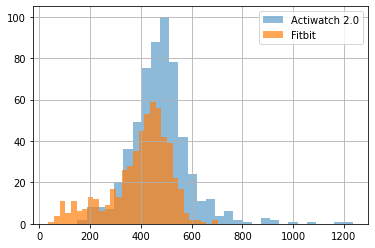

In [182]:
from scipy import stats

df['sleep_duration_act'].hist(bins=30, label = "Actiwatch 2.0", alpha = 0.5)
df['sleep_duration_fit'].hist(bins=30, label = "Fitbit", alpha = 0.7)
plt.legend()
plt.savefig(results_dir + 'tst_histogram.png', dpi=300)
stats.shapiro(df['sleep_duration_fit'].dropna())

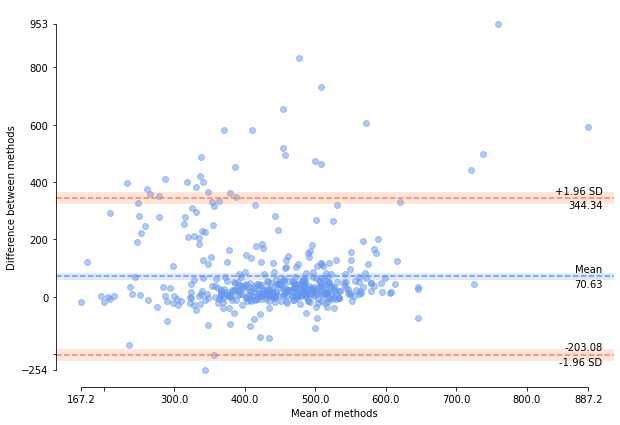

<Figure size 432x288 with 0 Axes>

In [230]:
import pyCompare

df1 = df.dropna(axis = 0)

pyCompare.blandAltman(df1['sleep_duration_act'].values, df1['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

plt.savefig(results_dir + 'bland_tst.png', dpi=300)

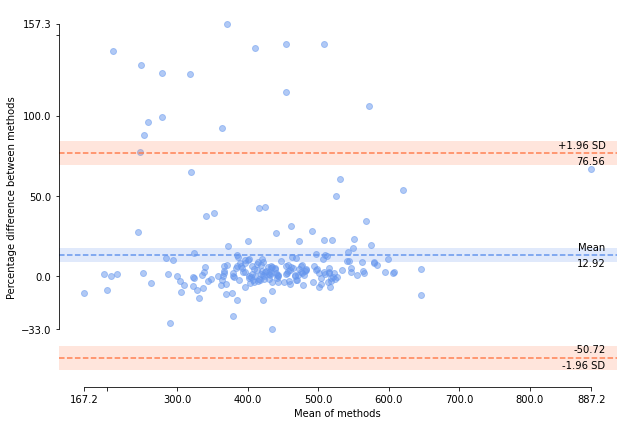

In [184]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['sleep_duration_act'].values, YA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

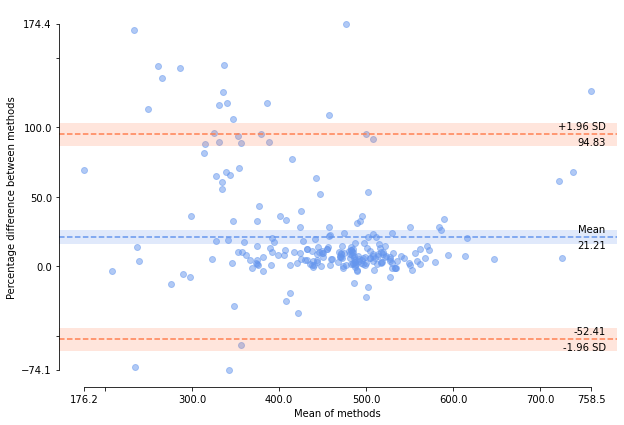

In [185]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['sleep_duration_act'].values, OA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

<AxesSubplot:xlabel='sleep_duration_act', ylabel='sleep_duration_fit'>

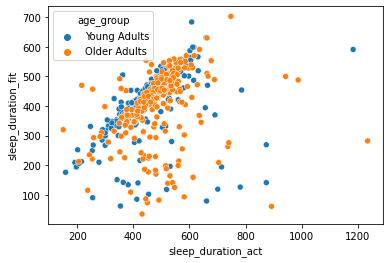

In [186]:
sns.scatterplot(data=df, x='sleep_duration_act', y='sleep_duration_fit', hue='age_group')

In [187]:
import pingouin as pg
pg.rm_corr(data=OA, x='sleep_duration_act', y='sleep_duration_fit', subject='subject')


,r,dof,pval,CI95%,power
rm_corr,0.328529,208,0.000001,"[0.2, 0.44]",0.998459


In [188]:
pg.rm_corr(data=YA, x='sleep_duration_act', y='sleep_duration_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.410873,190,3.228433e-09,"[0.29, 0.52]",0.999975


ShapiroResult(statistic=nan, pvalue=1.0)

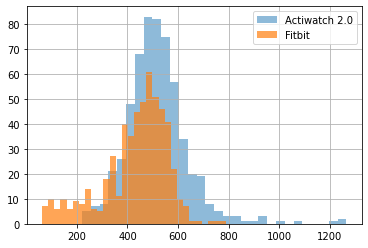

In [189]:
from scipy import stats

df['time_in_bed_act'].hist(bins=30, label = "Actiwatch 2.0", alpha = 0.5)
df['time_in_bed_fit'].hist(bins=30, label = "Fitbit", alpha = 0.7)
plt.legend()
plt.savefig(results_dir + 'tib_histogram.png', dpi=300)
stats.shapiro(df['time_in_bed_fit'])

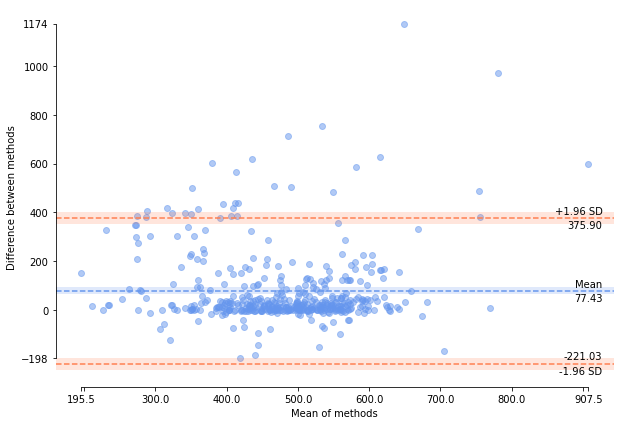

In [229]:
pyCompare.blandAltman(df1['time_in_bed_act'].values, df1['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

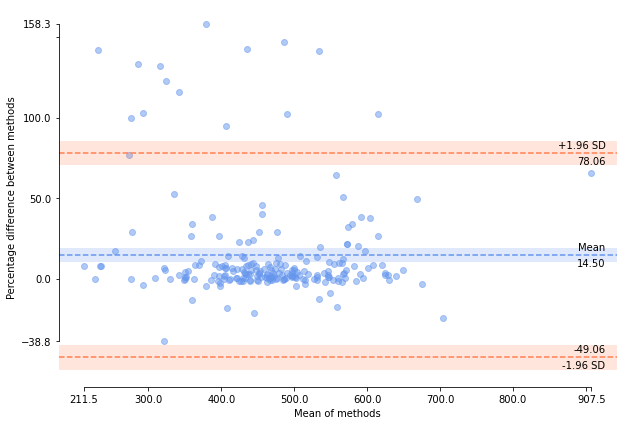

In [191]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['time_in_bed_act'].values, YA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

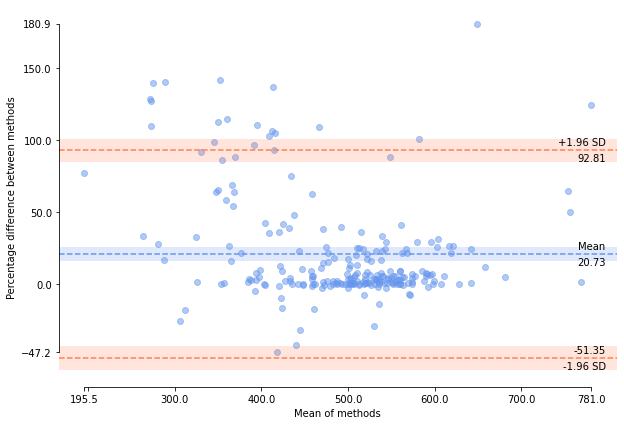

In [192]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['time_in_bed_act'].values, OA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

In [193]:
pg.rm_corr(data=sleep, x='time_in_bed_act', y='time_in_bed_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.335674,435,5.712108e-13,"[0.25, 0.42]",1.0


In [227]:
corrdf = df.groupby(['subject', 'handedness', 'age_group', 'fitbit_device', 'dominant', 'actiwatch_arm'])[['time_in_bed_act', 'time_in_bed_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['time_in_bed_act'] != 1]['time_in_bed_act']).reset_index().drop('level_6', axis=1)
corrdf = corrdf.set_index('subject')
corrdf.tail()

,handedness,age_group,fitbit_device,dominant,actiwatch_arm,time_in_bed_act
subject,,,,,,
20178,Right,Older Adults,Fitbit Inspire HR,Non-Dominant,Left,0.547945
20180,Right,Older Adults,Fitbit Charge 2 HR,Dominant,Right,0.654545
20181,Right,Older Adults,Fitbit Inspire HR,Non-Dominant,Left,-0.163636
20182,Right,Older Adults,Fitbit Inspire HR,Dominant,Right,0.766929
20184,Right,Older Adults,Fitbit Inspire HR,Non-Dominant,Left,0.250000


In [228]:
from scipy.stats import ttest_ind

cat1= corrdf[corrdf['age_group'] == "Young Adults"]
cat2 = corrdf[corrdf['age_group'] == "Older Adults"]

ttest_ind(cat1['time_in_bed_act'].values, cat2['time_in_bed_act'].values, nan_policy = "omit")

Ttest_indResult(statistic=1.16362125990982, pvalue=0.25099388011671037)

In [221]:
from scipy.stats import ttest_ind

cat1= corrdf[corrdf['handedness'] == "Right"]
cat2 = corrdf[corrdf['handedness'] != "Right"]

ttest_ind(cat1['time_in_bed_act'].values, cat2['time_in_bed_act'].values, nan_policy = "omit")

Ttest_indResult(statistic=-0.19548929711096866, pvalue=0.8459307657121422)

In [222]:
from scipy.stats import ttest_ind

cat1= corrdf[corrdf['fitbit_device'] == "Fitbit Inspire HR"]
cat2 = corrdf[corrdf['fitbit_device'] != "Fitbit Inspire HR"]

ttest_ind(cat1['time_in_bed_act'].values, cat2['time_in_bed_act'].values, nan_policy = "omit")

Ttest_indResult(statistic=-0.04043924695974548, pvalue=0.9679301245264983)

In [225]:
from scipy.stats import ttest_ind

cat1= corrdf[corrdf['dominant'] == "Dominant"]
cat2 = corrdf[corrdf['dominant'] != "Dominant"]

ttest_ind(cat1['time_in_bed_act'].values, cat2['time_in_bed_act'].values, nan_policy = "omit")

Ttest_indResult(statistic=-0.45969629786745253, pvalue=0.6480500891637271)

In [226]:
from scipy.stats import ttest_ind

cat1= corrdf[corrdf['actiwatch_arm'] == "Left"]
cat2 = corrdf[corrdf['actiwatch_arm'] != "Left"]

ttest_ind(cat1['time_in_bed_act'].values, cat2['time_in_bed_act'].values, nan_policy = "omit")

Ttest_indResult(statistic=0.20053545043851922, pvalue=0.8420073242727144)

In [200]:
corrdf = df.groupby('subject')[['sleep_duration_act', 'sleep_duration_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['sleep_duration_act'] != 1]['sleep_duration_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf.head()

,subject,sleep_duration_act,group
0,10012,0.857143,Young Adults
1,10014,0.828571,Young Adults
2,10016,0.523810,Young Adults
3,10023,0.236364,Young Adults
4,10024,0.764317,Young Adults


In [201]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['sleep_duration_act'].values, OA['sleep_duration_act'].values, nan_policy = "omit")

Ttest_indResult(statistic=1.4826487990026727, pvalue=0.14513771534438255)

# Interpreting Bland-Altman plots

[Towards Data Science post](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

## Sleep Summary Stats <a class="anchor" id="sleep-summary-stats"></a>

In [9]:
df = pd.read_csv(data_dir + 'dataset_2021_07_19.csv')
# df = df[~df.index.isin(exclude)]
df = df.dropna(axis=1, how='all')

In [10]:
df[0:5]

,subject,redcap_id,age_group,handedness,actiwatch_arm,fitbit_device,dominant,join_date,start_date_act,interval_number_act,...,onset_latency_fit,time_in_bed_fit,awake_duration_fit,wake_time_fit,sleep_duration_act_manual,sleep_duration_fit_manual,tdif,joinid,lag_time,arm
0,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-25,10/24/2019,1.0,...,0.0,556.0,4.0,2019-10-25 05:19:00,552.0,508.0,4.0,10011 2019-10-25,NaN,1
1,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-26,10/25/2019,2.0,...,NaN,NaN,NaN,NaN,482.0,NaN,NaN,10011 2019-10-26,1.0,1
2,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-27,10/26/2019,3.0,...,NaN,NaN,NaN,NaN,538.5,NaN,NaN,10011 2019-10-27,1.0,1
3,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-28,10/28/2019,4.0,...,NaN,NaN,NaN,NaN,340.0,NaN,NaN,10011 2019-10-28,1.0,1
4,10011,11,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-29,10/28/2019,5.0,...,NaN,NaN,NaN,NaN,393.0,NaN,NaN,10011 2019-10-29,1.0,1


<AxesSubplot:>

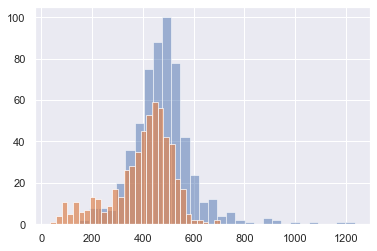

In [16]:
import scipy
df['sleep_duration_act'].hist(bins=30, label = "Actiwatch 2.0", alpha = 0.5)
df['sleep_duration_fit'].hist(bins=30, label = "Fitbit", alpha = 0.7)
# scipy.stats.shapiro(df['sleep_duration_fit'])

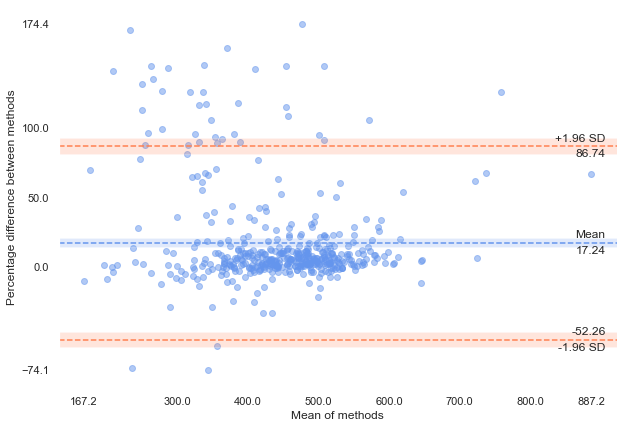

In [17]:
import pyCompare

df1 = df.dropna(axis = 0)

pyCompare.blandAltman(df1['sleep_duration_act'].values, df1['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

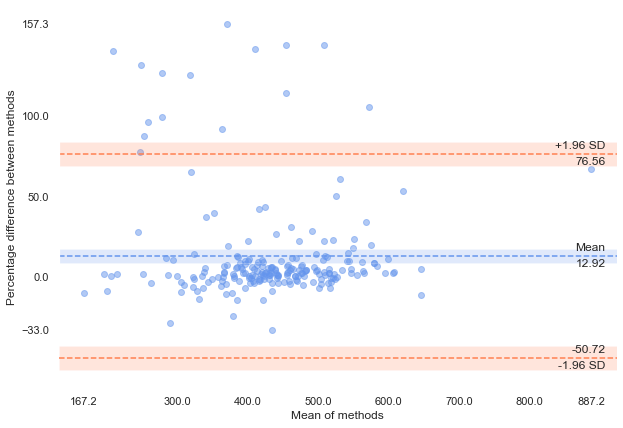

In [47]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['sleep_duration_act'].values, YA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

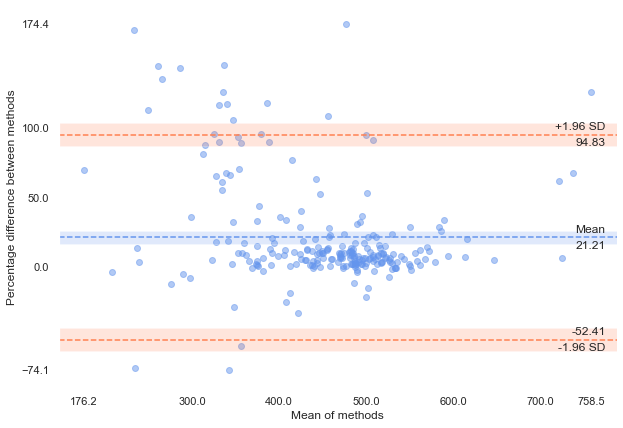

In [48]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['sleep_duration_act'].values, OA['sleep_duration_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Sleep duration assessed by the Actiwatch and Fitbit are significantly different. Because 70.63 > 0, Fitbit tends to underestimate sleep duration by about 70 minutes on average.

In [18]:
import pingouin as pg
pg.rm_corr(data=sleep, x='sleep_duration_act', y='sleep_duration_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.382482,435,1.132181e-16,"[0.3, 0.46]",1.0


<AxesSubplot:>

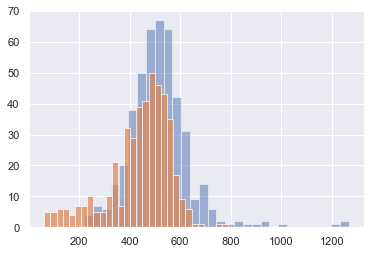

In [19]:
import scipy

df1['time_in_bed_act'].hist(bins=30, alpha = 0.5)
df1['time_in_bed_fit'].hist(bins=30, alpha = 0.7)
# scipy.stats.shapiro(df1['time_in_bed_fit'])

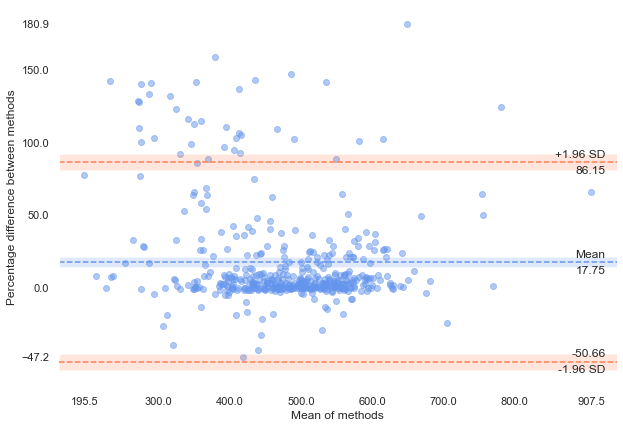

In [20]:
pyCompare.blandAltman(df1['time_in_bed_act'].values, df1['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

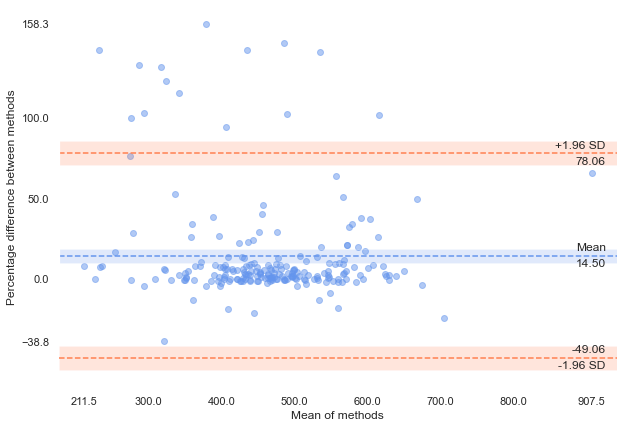

In [45]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(YA['time_in_bed_act'].values, YA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

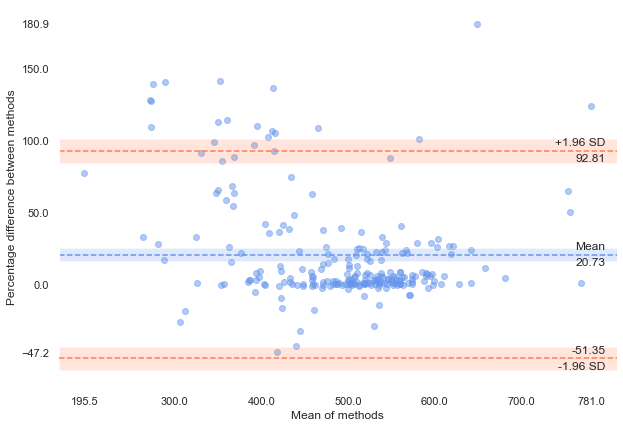

In [46]:
YA = df1[df1['age_group'] == 'Young Adults']
OA = df1[df1['age_group'] == 'Older Adults']

pyCompare.blandAltman(OA['time_in_bed_act'].values, OA['time_in_bed_fit'].values,
            limitOfAgreement=1.96,
            confidenceInterval=95,
            confidenceIntervalMethod='approximate',
            detrend=None,
            percentage=True)

Time in bed assessed by the Actiwatch and Fitbit are also significantly different. Because 77.43 > 0, Fitbit tends to underestimate time in bed by about 77 minutes on average.

In [21]:
pg.rm_corr(data=sleep, x='time_in_bed_act', y='time_in_bed_fit', subject='subject')


/usr/local/lib/python3.9/site-packages/pingouin/correlation.py:1156: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)


,r,dof,pval,CI95%,power
rm_corr,0.335674,435,5.712108e-13,"[0.25, 0.42]",1.0


In [37]:
corrdf = df.groupby('subject')[['time_in_bed_act', 'time_in_bed_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['time_in_bed_act'] != 1]['time_in_bed_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,time_in_bed_act,group
0,10012,0.857143,Young Adults
1,10014,0.714286,Young Adults
2,10016,0.452381,Young Adults
3,10023,0.268793,Young Adults
4,10024,0.903297,Young Adults
5,10025,0.964835,Young Adults
6,10033,-0.081319,Young Adults
7,10035,0.964835,Young Adults
8,10038,0.753783,Young Adults
9,10040,0.521978,Young Adults


In [41]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['time_in_bed_act'].values, OA['time_in_bed_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.16362125990982, pvalue=0.25099388011671037)

In [42]:
corrdf = df.groupby('subject')[['sleep_duration_act', 'sleep_duration_fit']].corr(method = 'spearman')
corrdf = pd.DataFrame(corrdf[corrdf['sleep_duration_act'] != 1]['sleep_duration_act']).reset_index().drop('level_1', axis=1)
corrdf['group'] = np.where(corrdf['subject'] < 20000, "Young Adults", "Older Adults")
corrdf

,subject,sleep_duration_act,group
0,10012,0.857143,Young Adults
1,10014,0.828571,Young Adults
2,10016,0.523810,Young Adults
3,10023,0.236364,Young Adults
4,10024,0.764317,Young Adults
5,10025,0.890110,Young Adults
6,10033,0.264318,Young Adults
7,10035,0.942857,Young Adults
8,10038,0.829670,Young Adults
9,10040,0.538462,Young Adults


In [43]:
from scipy.stats import ttest_ind

YA = corrdf[corrdf['group'] == "Young Adults"]
OA = corrdf[corrdf['group'] == "Older Adults"]

ttest_ind(YA['sleep_duration_act'].values, OA['sleep_duration_act'].values, nan_policy = "omit")

# YA['time_in_bed_act'].values

Ttest_indResult(statistic=1.4826487990026727, pvalue=0.14513771534438255)

# Interpreting Bland-Altman plots

[Towards Data Science post](https://towardsdatascience.com/why-how-to-use-the-bland-altman-plot-for-a-b-testing-python-code-78712d28c362)

# Correlations tst, se, with mood

In [288]:
import re
cr = pd.read_csv('/Volumes/schnyer/Megan/Wearables/results/' + 'cr_cosinor_df.csv').dropna()
npar = pd.read_csv('/Volumes/schnyer/Megan/Wearables/results/' + 'cr_nonpar_df.csv').dropna()

cr['subject'] = [re.findall("\d+", sub)[0] for sub in cr['Unnamed: 0']]
cr = cr.drop_duplicates(['subject', 'device'])
cr.drop(['Unnamed: 0'], axis=1, inplace=True)

drop_subs = [10148, 20103, 20184]
npar = npar[~npar['subject'].isin(drop_subs)]
npar = npar.drop_duplicates(['subject', 'device'])
cr = cr[~cr['subject'].isin(drop_subs)]

In [289]:
df2 = cr.pivot_table(index='subject', columns='device')
df2.columns = ['{}_{}'.format(x,y) for x,y in df2.columns]
df2 = df2.reset_index()

In [290]:
df2n = npar.pivot_table(index='subject', columns='device')
df2n.columns = ['{}_{}'.format(x,y) for x,y in df2n.columns]
df2n = df2n.reset_index()

In [291]:
df2.head()

,subject,actmin_Actiwatch,actmin_Fitbit,alpha_Actiwatch,alpha_Fitbit,amp_Actiwatch,amp_Fitbit,beta_Actiwatch,beta_Fitbit,phi_Actiwatch,phi_Fitbit
0,10011,0.119639,0.085566,6.941031,6.958278,0.631789,0.621676,6.008405,6.041740,12.489618,12.502249
1,10012,0.045242,0.074178,6.922122,6.909320,0.584838,0.598329,5.973979,5.956696,12.561280,13.216577
2,10014,0.098918,0.076620,6.928062,6.931347,0.616580,0.604754,5.989491,5.985179,12.810061,13.183611
3,10016,0.061080,0.077278,6.937518,6.956235,0.596171,0.610647,5.993387,6.020787,12.131284,11.993785
4,10023,0.065678,0.106759,6.909754,6.902186,0.590902,0.614339,5.957397,5.955366,12.411471,12.976970


In [292]:
df['subject'] = df['subject'].astype(str)
df2['subject'] = df2['subject'].astype(str)
df2n['subject'] = df2n['subject'].astype(str)

In [293]:
mood = pd.read_csv('/Users/mcmahonmc/Library/CloudStorage/Box-Box/CogNeuroLab/Wearables/data/sleep_diaries/sleepDiaries.csv')
mood['record_id'] = mood['record_id'].astype(str)
mood = mood.groupby('record_id').mean().reset_index()
mood.head()

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (10,24,78,96,97,101,102,124,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,291,297,299,301,305,309) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,record_id,experimenter_1_timestamp,redcap_survey_identifier,gender,global_psqi,bed_time,awakening5_time,awakening5_length,awakening6_time,awakening6_length,...,ruminate,activity,Place_Gym,Place_Home,Place_Library,Place_Outside,Place_Store_mall,Place_Other,tib,tst
0,10011,NaN,NaN,2.0,1.117647,79943.076923,18900.0,NaN,NaN,NaN,...,0.153846,1.384615,0.000000,1.000000,0.000000,0.846154,0.692308,0.000000,1439.999999,1439.999999
1,10012,NaN,NaN,2.0,2.000000,17014.285714,NaN,NaN,NaN,NaN,...,0.000000,0.357143,0.000000,0.928571,0.071429,0.642857,0.285714,0.000000,1440.000000,1440.000000
2,10013,NaN,NaN,2.0,4.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10014,NaN,NaN,2.0,6.000000,51550.000000,NaN,NaN,NaN,NaN,...,51.916667,1.750000,0.166667,1.000000,0.000000,0.083333,0.416667,0.083333,1440.000000,1440.000000
4,10016,NaN,NaN,2.0,5.000000,59785.714286,NaN,NaN,NaN,NaN,...,4.571429,1.142857,0.000000,1.000000,0.000000,0.928571,0.214286,0.142857,1439.999999,1440.000000


In [294]:
df_ = pd.merge(df, df2, on='subject', how='outer')
df_ = pd.merge(df_, df2n, on='subject', how='outer')
df_ = pd.merge(df_, mood, left_on='subject', right_on='record_id', how='outer')
df_.head()

,subject,redcap_id,age_group_x,handedness,actiwatch_arm,fitbit_device,dominant,join_date,start_date_act,interval_number_act,...,ruminate,activity,Place_Gym,Place_Home,Place_Library,Place_Outside,Place_Store_mall,Place_Other,tib,tst
0,10011,11.0,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-25,10/24/2019,1.0,...,0.153846,1.384615,0.0,1.0,0.0,0.846154,0.692308,0.0,1439.999999,1439.999999
1,10011,11.0,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-26,10/25/2019,2.0,...,0.153846,1.384615,0.0,1.0,0.0,0.846154,0.692308,0.0,1439.999999,1439.999999
2,10011,11.0,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-27,10/26/2019,3.0,...,0.153846,1.384615,0.0,1.0,0.0,0.846154,0.692308,0.0,1439.999999,1439.999999
3,10011,11.0,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-28,10/28/2019,4.0,...,0.153846,1.384615,0.0,1.0,0.0,0.846154,0.692308,0.0,1439.999999,1439.999999
4,10011,11.0,Young Adults,Right,Right,Fitbit Charge 2 HR,Dominant,2019-10-29,10/28/2019,5.0,...,0.153846,1.384615,0.0,1.0,0.0,0.846154,0.692308,0.0,1439.999999,1439.999999


In [343]:
dfg = df_.groupby(['subject', 'age_group_x']).mean().reset_index()
from scipy.stats import ttest_ind

cat1= dfg[dfg['age_group_x'] == "Young Adults"]
cat2 = dfg[dfg['age_group_x'] == "Older Adults"]

for col in [c for c in list(df2.columns) if c.endswith('watch') and df2[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))

actmin_Actiwatch
Ttest_indResult(statistic=-1.046204494739761, pvalue=0.3010539083406065)
alpha_Actiwatch
Ttest_indResult(statistic=-5.336782899506185, pvalue=2.974812850013753e-06)
amp_Actiwatch
Ttest_indResult(statistic=-3.070671793530071, pvalue=0.003615476451906944)
beta_Actiwatch
Ttest_indResult(statistic=-5.742942761245557, pvalue=7.506415614433532e-07)
phi_Actiwatch
Ttest_indResult(statistic=1.542987379738352, pvalue=0.12983766860727936)


In [348]:
import datetime as dt

df_['COVID'] = np.where(pd.to_datetime(df_['start_date_act']) > pd.to_datetime('2020-03-01'), True, False)

cat1 = df_[df_['COVID'] == True]
cat2 = df_[df_['COVID'] == False]

for col in [c for c in list(df2.columns) if c.endswith('watch') and df2[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))
        

actmin_Actiwatch
Ttest_indResult(statistic=-1.1530992922047636, pvalue=0.24934217356037108)
alpha_Actiwatch
Ttest_indResult(statistic=7.926534755836165, pvalue=1.1513116687434432e-14)
amp_Actiwatch
Ttest_indResult(statistic=2.6921028812963654, pvalue=0.007304296482135816)
beta_Actiwatch
Ttest_indResult(statistic=8.19552947272421, pvalue=1.5896810011864636e-15)
phi_Actiwatch
Ttest_indResult(statistic=-0.6136582826279661, pvalue=0.5396805129558127)


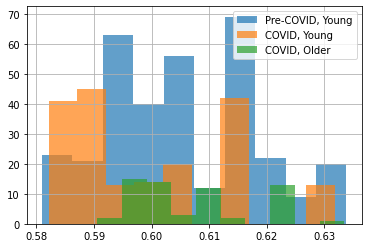

In [356]:
cat1['amp_Actiwatch'].hist(alpha=.7, label='Pre-COVID, Young')
cat2['amp_Actiwatch'][cat2['age_group_x'] == 'Young Adults'].hist(alpha=.7, label='COVID, Young')
cat2['amp_Actiwatch'][cat2['age_group_x'] == 'Older Adults'].hist(alpha=.7, label='COVID, Older')

plt.legend()
# plt.savefig('amp_gr_dif.png', dpi=300)

In [360]:
import datetime as dt

df_['season'] = pd.to_datetime(df_['start_date_act']).dt.month%12 // 3 + 1
cat1 = df_[df_['season'] == 3.0]
cat2 = df_[df_['season'] != 3.0]

for col in [c for c in list(df2.columns) if c.endswith('watch') and df2[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))

actmin_Actiwatch
Ttest_indResult(statistic=0.05803896644769814, pvalue=0.9537374769672569)
alpha_Actiwatch
Ttest_indResult(statistic=2.8113053940647497, pvalue=0.00510002747525677)
amp_Actiwatch
Ttest_indResult(statistic=1.435727605126906, pvalue=0.15161617280436365)
beta_Actiwatch
Ttest_indResult(statistic=3.041367106383701, pvalue=0.002460893198339262)
phi_Actiwatch
Ttest_indResult(statistic=-2.7052482074712207, pvalue=0.0070249171937258464)


1=Male, 2=Female

No handles with labels found to put in legend.


actmin_Fitbit


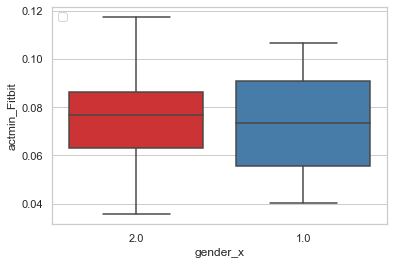

No handles with labels found to put in legend.


                            sum_sq     df          F    PR(>F)
C(age_group)              0.001883    1.0   4.645231  0.031567
C(gender_x)               0.000548    1.0   1.353106  0.245233
C(age_group):C(gender_x)  0.005874    1.0  14.490813  0.000156
Residual                  0.226191  558.0        NaN       NaN
alpha_Fitbit


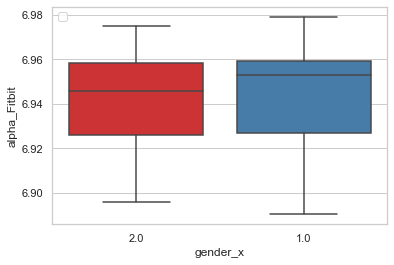

No handles with labels found to put in legend.


                            sum_sq     df           F        PR(>F)
C(age_group)              0.102608    1.0  322.592126  2.910252e-57
C(gender_x)               0.003724    1.0   11.706869  6.683020e-04
C(age_group):C(gender_x)  0.004145    1.0   13.031289  3.339025e-04
Residual                  0.177484  558.0         NaN           NaN
amp_Fitbit


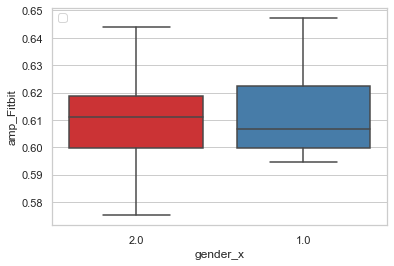

No handles with labels found to put in legend.


                            sum_sq     df           F        PR(>F)
C(age_group)              0.024400    1.0  119.688127  2.264540e-25
C(gender_x)               0.000322    1.0    1.581477  2.090741e-01
C(age_group):C(gender_x)  0.001067    1.0    5.233628  2.252752e-02
Residual                  0.113753  558.0         NaN           NaN
beta_Fitbit


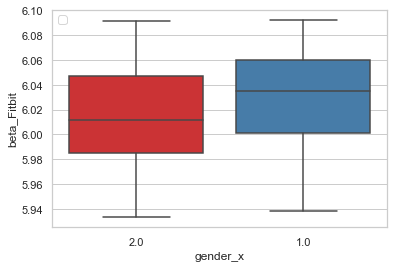

No handles with labels found to put in legend.


                            sum_sq     df           F        PR(>F)
C(age_group)              0.317140    1.0  330.675086  2.256542e-58
C(gender_x)               0.003967    1.0    4.135991  4.245307e-02
C(age_group):C(gender_x)  0.003672    1.0    3.828759  5.087851e-02
Residual                  0.535160  558.0         NaN           NaN
phi_Fitbit


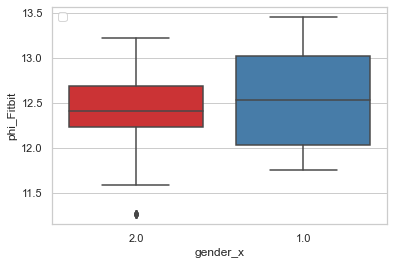

                              sum_sq     df           F        PR(>F)
C(age_group)               19.667307    1.0  109.318637  1.735158e-23
C(gender_x)                 5.398297    1.0   30.005863  6.525103e-08
C(age_group):C(gender_x)    0.194824    1.0    1.082910  2.984981e-01
Residual                  100.388715  558.0         NaN           NaN


In [420]:
df_['gender_x'] = df_['gender'].astype(str)
sns.set(style="whitegrid")
for col in [c for c in list(df2.columns) if c.endswith('bit') and df2[c].dtype == float ]:
        print(col)
        
        mod = ols('%s ~ C(age_group) * C(gender_x)' % col, data=df_[df_['gender'].isin([1.0, 2.0])]).fit()
        table = sm.stats.anova_lm(mod, typ=2)
        
        sns.boxplot(x='gender_x', y=col, data=df_[df_['gender'].isin([1.0, 2.0])], palette='Set1')
        plt.legend(loc='upper left')
        plt.show()
        
        print(table)

IS_Actiwatch


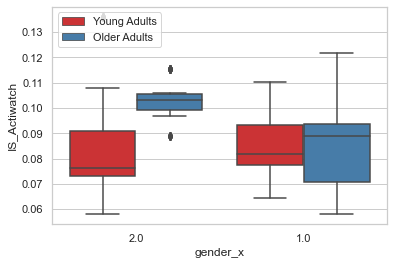

                            sum_sq     df          F        PR(>F)
C(age_group)              0.023991    1.0  91.935990  3.408733e-20
C(gender_x)               0.007639    1.0  29.275140  9.502206e-08
C(age_group):C(gender_x)  0.009138    1.0  35.016984  5.852479e-09
Residual                  0.139086  533.0        NaN           NaN
IV_Actiwatch


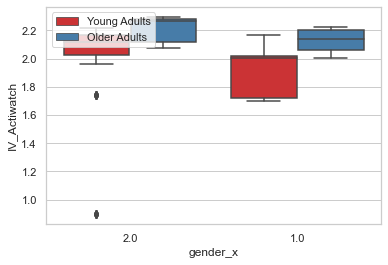

                             sum_sq     df           F        PR(>F)
C(age_group)               4.571614    1.0  108.800473  2.633661e-23
C(gender_x)                0.851327    1.0   20.260856  8.303544e-06
C(age_group):C(gender_x)   0.027680    1.0    0.658762  4.173596e-01
Residual                  22.395771  533.0         NaN           NaN
L5_Actiwatch


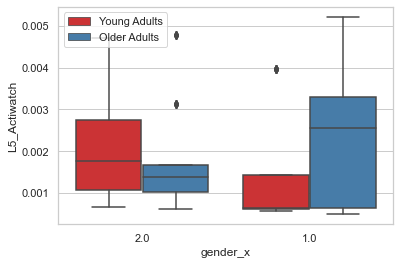

                                sum_sq     df          F        PR(>F)
C(age_group)              3.553333e-07    1.0   0.211819  6.455332e-01
C(gender_x)               6.872276e-06    1.0   4.096653  4.346651e-02
C(age_group):C(gender_x)  4.238739e-05    1.0  25.267674  6.824823e-07
Residual                  8.941257e-04  533.0        NaN           NaN
M10_Actiwatch


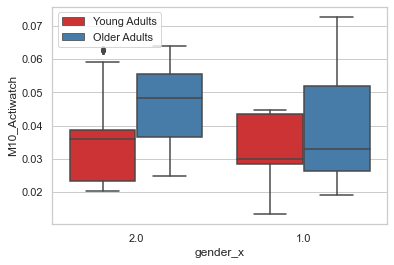

                            sum_sq     df          F        PR(>F)
C(age_group)              0.014853    1.0  80.632935  4.666634e-18
C(gender_x)               0.003363    1.0  18.258943  2.284140e-05
C(age_group):C(gender_x)  0.000752    1.0   4.085075  4.376288e-02
Residual                  0.098182  533.0        NaN           NaN
RA_Actiwatch


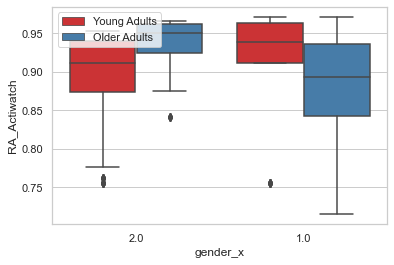

                            sum_sq     df          F        PR(>F)
C(age_group)              0.073419    1.0  16.286651  6.242019e-05
C(gender_x)               0.061176    1.0  13.570577  2.532180e-04
C(age_group):C(gender_x)  0.129077    1.0  28.633190  1.301130e-07
Residual                  2.402739  533.0        NaN           NaN


In [425]:
df_['gender_x'] = df_['gender'].astype(str)
sns.set(style="whitegrid")
for col in [c for c in list(df2n.columns) if c.endswith('watch') and df2n[c].dtype == float ]:
        print(col)
        
        mod = ols('%s ~ C(age_group) * C(gender_x)' % col, data=df_[df_['gender'].isin([1.0, 2.0])]).fit()
        table = sm.stats.anova_lm(mod, typ=2)
        
        sns.boxplot(x='gender_x', y=col, hue='age_group', data=df_[df_['gender'].isin([1.0, 2.0])], palette='Set1')
        plt.legend(loc='upper left')
        plt.show()
        
        print(table)

In [403]:
mod = ols('IS_Actiwatch ~ C(age_group) * C(gender_x) + C(COVID)', data=df_[df_['gender'].isin([1.0, 2.0])]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IS_Actiwatch   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     33.31
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           8.21e-25
Time:                        13:45:40   Log-Likelihood:                 1455.6
No. Observations:                 537   AIC:                            -2901.
Df Residuals:                     532   BIC:                            -2880.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.0863      0.002     44.988      0.000       0.082       0.090
C(age_group)[T.Young Adults]                       -0.0020      0.003     -0.803      0.422      -0.007       0.003
C(gender_x)[T.2.0]                                  0.0161      0.002      7.974      0.000       0.012       0.020
C(COVID)[T.True]                                    0.0008      0.002      0.512      0.609      -0.002       0.004
C(age_group)[T.Young Adults]:C(gender_x)[T.2.0]    -0.0181      0.003     -5.857      0.000      -0.024      -0.012
==============================================================================
Omnibus:                       77.785   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.153
Skew:                           0.907   Prob(JB):                     2.45e-28
Kurtosis:                       4.547   Cond. No.                         8.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [426]:
mod = ols('phi_Fitbit ~ C(age_group) + C(COVID)', data=df_[df_['gender'].isin([1.0, 2.0])]).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             phi_Fitbit   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     56.31
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           5.24e-23
Time:                        14:04:56   Log-Likelihood:                -314.93
No. Observations:                 562   AIC:                             635.9
Df Residuals:                     559   BIC:                             648.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.4715      0.040    311.526      0.000      12.393      12.550
C(age_group)[T.Young Adults]     0.2430      0.039      6.159      0.000       0.166       0.321
C(COVID)[T.True]                -0.2099      0.040     -5.292      0.000      -0.288      -0.132
==============================================================================
Omnibus:                        2.745   Durbin-Watson:                   0.244
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.787
Skew:                           0.145   Prob(JB):                        0.248
Kurtosis:                       2.812   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

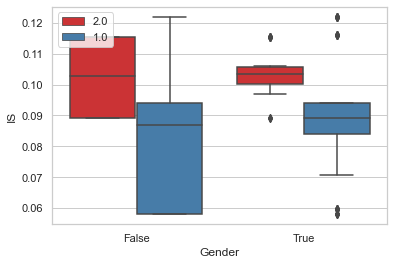

In [417]:
OA = df_[df_['age_group'] == "Older Adults"]

sns.boxplot(x='COVID', y='IS_Actiwatch', hue='gender_x', data=OA[OA['gender'].isin([1.0, 2.0])], palette='Set1')#.set_xticklabels(['Female', 'Male'])
plt.legend(loc='upper left')
plt.xlabel('Gender'); plt.ylabel('IS')
plt.show()

actmin_Fitbit


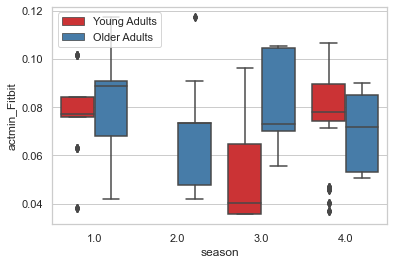

                sum_sq     df          F    PR(>F)
C(age_group)  0.005232    1.0  13.661180  0.000242
C(season)     0.009778    3.0   8.510509  0.000016
Residual      0.198375  518.0        NaN       NaN
alpha_Fitbit


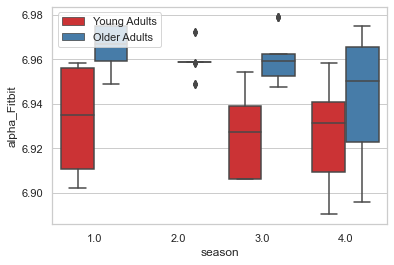

                sum_sq     df           F        PR(>F)
C(age_group)  0.075658    1.0  240.240586  8.585213e-45
C(season)     0.007578    3.0    8.020870  3.111410e-05
Residual      0.163131  518.0         NaN           NaN
amp_Fitbit


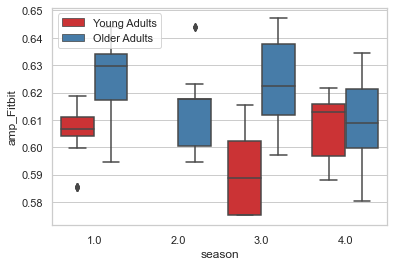

                sum_sq     df           F        PR(>F)
C(age_group)  0.026479    1.0  144.463056  1.595365e-29
C(season)     0.006302    3.0   11.461269  2.753411e-07
Residual      0.094946  518.0         NaN           NaN
beta_Fitbit


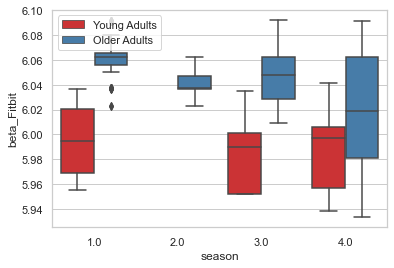

                sum_sq     df           F        PR(>F)
C(age_group)  0.253812    1.0  279.320937  1.816403e-50
C(season)     0.027807    3.0   10.200694  1.549575e-06
Residual      0.470694  518.0         NaN           NaN
phi_Fitbit


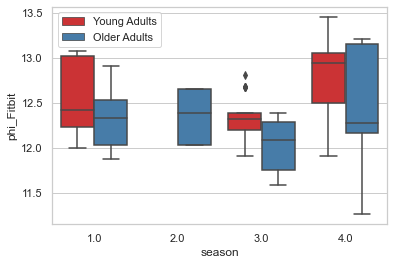

                 sum_sq     df          F        PR(>F)
C(age_group)   9.532951    1.0  58.550944  9.740134e-14
C(season)     11.948920    3.0  24.463239  8.100186e-15
Residual      84.337984  518.0        NaN           NaN


In [427]:
df_['age_group'] = df_['age_group_x']
sns.set(style="whitegrid")
for col in [c for c in list(df2.columns) if c.endswith('bit') and df2[c].dtype == float ]:
        print(col)
        
        mod = ols('%s ~ C(age_group) + C(season)' % col, data=df_).fit()
        table = sm.stats.anova_lm(mod, typ=2)
        
        sns.boxplot(x='season', y=col, data=df_, hue='age_group', palette='Set1')
        plt.legend(loc='upper left')
        plt.show()
        
        print(table)

IS_Fitbit


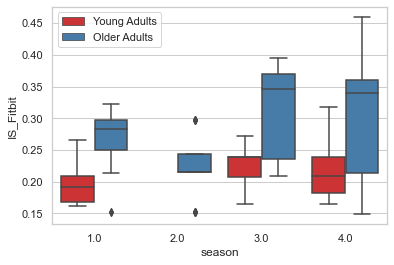

                sum_sq     df           F        PR(>F)
C(age_group)  0.694829    1.0  224.795106  5.516150e-42
C(season)     0.217404    3.0   23.445210  3.515988e-14
Residual      1.489836  482.0         NaN           NaN
IV_Fitbit


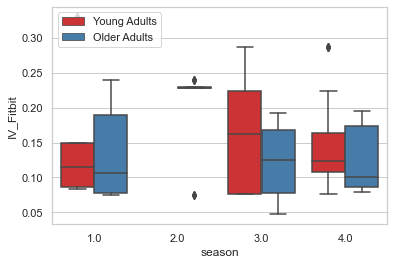

                sum_sq     df          F        PR(>F)
C(age_group)  0.023351    1.0   7.101403  7.960681e-03
C(season)     0.215286    3.0  21.823827  2.875146e-13
Residual      1.584935  482.0        NaN           NaN
L5_Fitbit


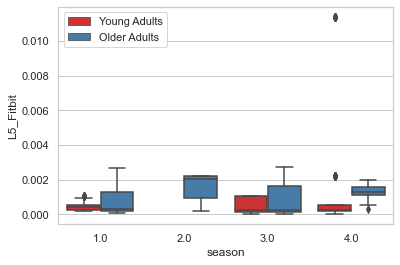

                    sum_sq     df        F    PR(>F)
C(age_group)  2.281775e-07    1.0  0.06429  0.799948
C(season)     9.049930e-05    3.0  8.49952  0.000016
Residual      1.710711e-03  482.0      NaN       NaN
M10_Fitbit


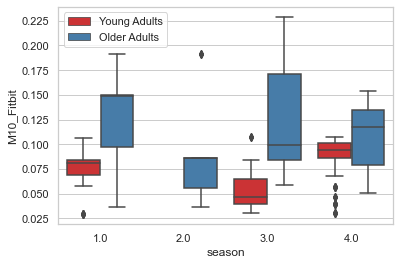

                sum_sq     df           F        PR(>F)
C(age_group)  0.195526    1.0  149.751686  3.569343e-30
C(season)     0.048800    3.0   12.458429  7.365114e-08
Residual      0.629334  482.0         NaN           NaN
RA_Fitbit


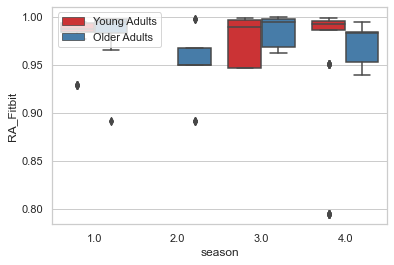

                sum_sq     df          F        PR(>F)
C(age_group)  0.001731    1.0   1.314276  2.521907e-01
C(season)     0.046805    3.0  11.848708  1.686035e-07
Residual      0.634671  482.0        NaN           NaN


In [428]:
df_['age_group'] = df_['age_group_x']
sns.set(style="whitegrid")
for col in [c for c in list(df2n.columns) if c.endswith('bit') and df2n[c].dtype == float ]:
        print(col)
        
        mod = ols('%s ~ C(age_group) + C(season)' % col, data=df_).fit()
        table = sm.stats.anova_lm(mod, typ=2)
        
        sns.boxplot(x='season', y=col, data=df_, hue='age_group', palette='Set1')
        plt.legend(loc='upper left')
        plt.show()
        
        print(table)

actmin_Actiwatch


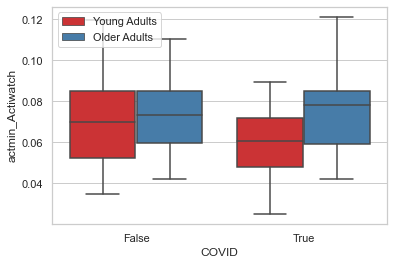

                sum_sq     df          F    PR(>F)
C(age_group)  0.007389    1.0  17.861705  0.000028
C(COVID)      0.003475    1.0   8.401138  0.003891
Residual      0.240749  582.0        NaN       NaN
alpha_Actiwatch


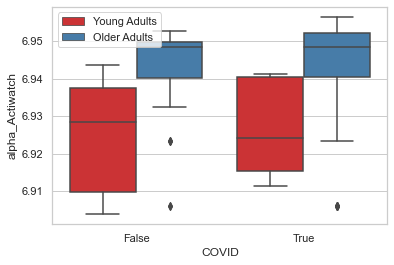

                sum_sq     df           F        PR(>F)
C(age_group)  0.043142    1.0  321.540222  1.426202e-57
C(COVID)      0.000146    1.0    1.087213  2.975225e-01
Residual      0.078088  582.0         NaN           NaN
amp_Actiwatch


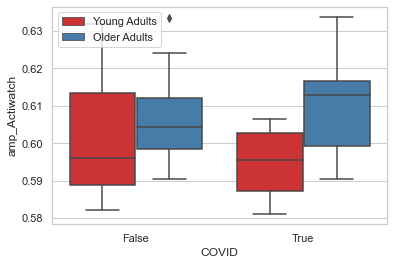

                sum_sq     df           F        PR(>F)
C(age_group)  0.017334    1.0  114.935254  1.350717e-24
C(COVID)      0.000625    1.0    4.144752  4.221610e-02
Residual      0.087777  582.0         NaN           NaN
beta_Actiwatch


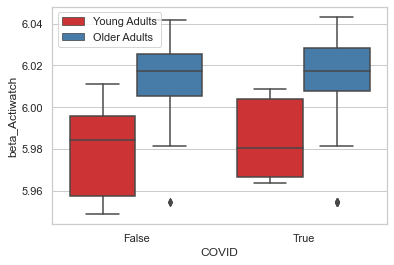

                sum_sq     df           F        PR(>F)
C(age_group)  0.134120    1.0  372.624102  1.526794e-64
C(COVID)      0.000360    1.0    1.000891  3.175107e-01
Residual      0.209482  582.0         NaN           NaN
phi_Actiwatch


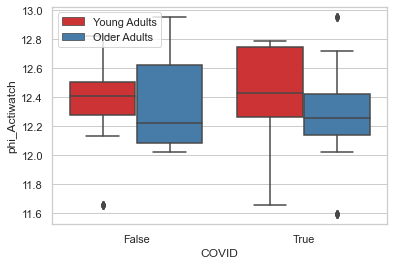

                 sum_sq     df          F        PR(>F)
C(age_group)   2.171484    1.0  29.658665  7.609670e-08
C(COVID)       0.240860    1.0   3.289730  7.022933e-02
Residual      42.611622  582.0        NaN           NaN


In [376]:
for col in [c for c in list(df2.columns) if c.endswith('watch') and df2[c].dtype == float ]:
        print(col)
        
        mod = ols('%s ~ C(age_group) + C(COVID)' % col, data=df_).fit()
        table = sm.stats.anova_lm(mod, typ=2)
        
        sns.boxplot(x='COVID', y=col, data=df_, hue='age_group', palette='Set1')
        plt.legend(loc='upper left')
        plt.show()
        
        print(table)

IS_Actiwatch


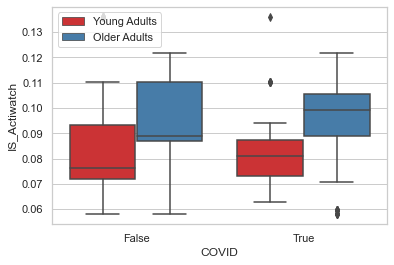

                sum_sq     df          F        PR(>F)
C(age_group)  0.014964    1.0  51.181086  2.729524e-12
C(COVID)      0.000087    1.0   0.297689  5.855580e-01
Residual      0.159339  545.0        NaN           NaN
IV_Actiwatch


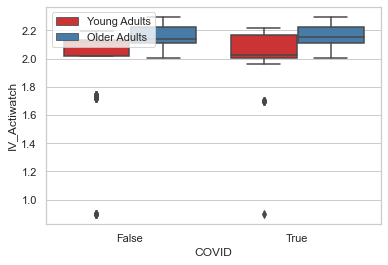

                 sum_sq     df          F        PR(>F)
C(age_group)   2.469155    1.0  57.963237  1.185049e-13
C(COVID)       0.081193    1.0   1.905997  1.679745e-01
Residual      23.216257  545.0        NaN           NaN
L5_Actiwatch


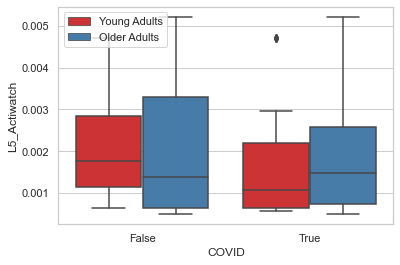

                sum_sq     df         F    PR(>F)
C(age_group)  0.000004    1.0  2.249403  0.134245
C(COVID)      0.000006    1.0  3.569855  0.059368
Residual      0.000955  545.0       NaN       NaN
M10_Actiwatch


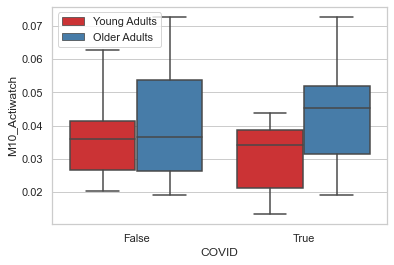

                sum_sq     df          F        PR(>F)
C(age_group)  0.011711    1.0  62.471169  1.506941e-14
C(COVID)      0.000378    1.0   2.016877  1.561305e-01
Residual      0.102171  545.0        NaN           NaN
RA_Actiwatch


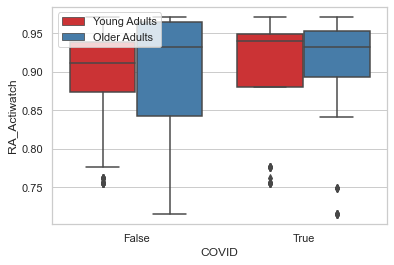

                sum_sq     df         F    PR(>F)
C(age_group)  0.020952    1.0  4.362227  0.037208
C(COVID)      0.016723    1.0  3.481594  0.062592
Residual      2.617706  545.0       NaN       NaN


In [377]:
for col in [c for c in list(df2n.columns) if c.endswith('watch') and df2n[c].dtype == float ]:
        print(col)
        
        mod = ols('%s ~ C(age_group) + C(COVID)' % col, data=df_).fit()
        table = sm.stats.anova_lm(mod, typ=2)
        
        sns.boxplot(x='COVID', y=col, data=df_, hue='age_group', palette='Set1')
        plt.legend(loc='upper left')
        plt.show()
        
        print(table)

In [362]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('amp_Actiwatch ~ C(age_group_x) + C(COVID)', 
    data=df_).fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          amp_Actiwatch   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     61.80
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           4.59e-25
Time:                        13:16:45   Log-Likelihood:                 1745.3
No. Observations:                 585   AIC:                            -3485.
Df Residuals:                     582   BIC:                            -3471.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.6109      0.001    530.912      0.000       0.609       0.613
C(age_group_x)[T.Young Adults]    -0.0121      0.001    -10.721      0.000      -0.014      -0.010
C(COVID)[T.True]                  -0.0023      0.001     -2.036      0.042      -0.005   -8.19e-05
==============================================================================
Omnibus:                       32.904   Durbin-Watson:                   0.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.484
Skew:                           0.595   Prob(JB):                     1.20e-08
Kurtosis:                       2.714   Cond. No.                         4.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [363]:
mod = ols('IS_Actiwatch ~ C(age_group_x) + C(COVID)', 
    data=df_).fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IS_Actiwatch   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     35.80
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           2.46e-15
Time:                        13:17:03   Log-Likelihood:                 1453.6
No. Observations:                 548   AIC:                            -2901.
Df Residuals:                     545   BIC:                            -2888.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0946      0.002     55.169      0.000       0.091       0.098
C(age_group_x)[T.Young Adults]    -0.0119      0.002     -7.154      0.000      -0.015      -0.009
C(COVID)[T.True]                   0.0009      0.002      0.546      0.586      -0.002       0.004
==============================================================================
Omnibus:                       22.918   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.960
Skew:                           0.376   Prob(JB):                     1.89e-07
Kurtosis:                       3.889   Cond. No.                         4.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [364]:
mod = ols('IV_Actiwatch ~ C(age_group_x) + C(COVID)', 
    data=df_).fit()

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           IV_Actiwatch   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     45.34
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           6.08e-19
Time:                        13:17:14   Log-Likelihood:                 88.651
No. Observations:                 548   AIC:                            -171.3
Df Residuals:                     545   BIC:                            -158.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.1433      0.021    103.590      0.000       2.103       2.184
C(age_group_x)[T.Young Adults]    -0.1529      0.020     -7.613      0.000      -0.192      -0.113
C(COVID)[T.True]                   0.0280      0.020      1.381      0.168      -0.012       0.068
==============================================================================
Omnibus:                      421.219   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6229.689
Skew:                          -3.359   Prob(JB):                         0.00
Kurtosis:                      18.089   Cond. No.                         4.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('amp_Actiwatch ~ C(age_group_x)*C(start_season)', 
    data=df_).fit()

table = sm.stats.anova_lm(mod, typ=2)
print(table)

                                  sum_sq     df           F        PR(>F)
C(age_group_x)                  0.021045    1.0  143.173598  2.726941e-29
C(start_season)                 0.000267    3.0    0.606212  5.458012e-01
C(age_group_x):C(start_season)  0.002791    3.0    6.329489  1.924487e-03
Residual                        0.075846  516.0         NaN           NaN


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [322]:
dfg = df_.groupby(['subject', 'age_group_x']).mean().reset_index()
from scipy.stats import ttest_ind

cat1= dfg[dfg['age_group_x'] == "Young Adults"]
cat2 = dfg[dfg['age_group_x'] == "Older Adults"]

for col in [c for c in list(df2n.columns) if c.endswith('watch') and df2n[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))

IS_Actiwatch
Ttest_indResult(statistic=-2.30646252837743, pvalue=0.02608793550135237)
IV_Actiwatch
Ttest_indResult(statistic=-2.589480735359104, pvalue=0.013153398412381622)
L5_Actiwatch
Ttest_indResult(statistic=-0.45132263897537384, pvalue=0.6540788786847709)
M10_Actiwatch
Ttest_indResult(statistic=-2.3218493563259233, pvalue=0.02516334007952695)
RA_Actiwatch
Ttest_indResult(statistic=-0.7660420495530796, pvalue=0.44793536140808854)


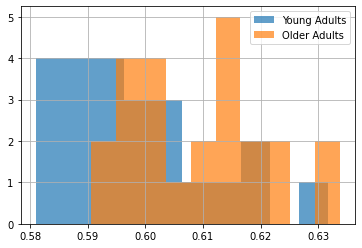

In [307]:
cat1['amp_Actiwatch'].hist(alpha=.7, label='Young Adults')
cat2['amp_Actiwatch'].hist(alpha=.7, label='Older Adults')
plt.legend()
plt.savefig('amp_gr_dif.png', dpi=300)

In [418]:
dfg = df_.groupby(['subject', 'age_group_x']).mean().reset_index()
from scipy.stats import ttest_ind

cat1= dfg[dfg['age_group_x'] == "Young Adults"]
cat2 = dfg[dfg['age_group_x'] == "Older Adults"]

for col in [c for c in df2.columns if c.endswith('bit') and df2[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))

actmin_Fitbit
Ttest_indResult(statistic=-0.8065341368577245, pvalue=0.42417708331593174)
alpha_Fitbit
Ttest_indResult(statistic=-4.9587902658125795, pvalue=1.0550770139869758e-05)
amp_Fitbit
Ttest_indResult(statistic=-3.3897949741330735, pvalue=0.0014645417874695871)
beta_Fitbit
Ttest_indResult(statistic=-5.211076348387802, pvalue=4.541245161136941e-06)
phi_Fitbit
Ttest_indResult(statistic=2.72819256957973, pvalue=0.009050675733906806)


In [419]:
dfg = df_.groupby(['subject', 'age_group_x']).mean().reset_index()
from scipy.stats import ttest_ind

cat1= dfg[dfg['age_group_x'] == "Young Adults"]
cat2 = dfg[dfg['age_group_x'] == "Older Adults"]

for col in [c for c in df2n.columns if c.endswith('bit') and df2n[c].dtype == float ]:
        print(col)
        print(ttest_ind(cat1[col].values, cat2[col].values, nan_policy = "omit"))

IS_Fitbit
Ttest_indResult(statistic=-3.920137701559607, pvalue=0.0003207746234805406)
IV_Fitbit
Ttest_indResult(statistic=0.5357635475821728, pvalue=0.5949480239061921)
L5_Fitbit
Ttest_indResult(statistic=-0.1264256546226653, pvalue=0.8999982982446751)
M10_Fitbit
Ttest_indResult(statistic=-3.1572653836736095, pvalue=0.002946075427208041)
RA_Fitbit
Ttest_indResult(statistic=-0.0031582206737954203, pvalue=0.9974950621657267)


In [317]:
dfg = df_.groupby(['subject', 'age_group_x']).mean().reset_index().groupby('age_group_x')
dfg = dfg[[c for c in df_.columns if '_Actiwatch' in c and df_[c].dtype == float]].describe().T
dfg = dfg.iloc[dfg.index.get_level_values(1).str.contains('mean|std')].reset_index().pivot_table(index=['level_0'], columns=['level_1'])
# dfg['mean_std'] = dfg['mean'].map('{:.2f}'.format).astype(str) + ' ' + corr_a['CI95%'].astype(str) + ' ' + corr_a['sig']
# dfg.round(3).to_latex('/Users/mcmahonmc/Desktop/actiwatch_group_mean_std.tex', index=True)
dfg

age_group_x      Older Adults           Young Adults          
level_1                  mean       std         mean       std
level_0                                                       
IS_Actiwatch         0.095525  0.016795     0.083389  0.018083
IV_Actiwatch         2.162860  0.083861     1.996638  0.289169
L5_Actiwatch         0.002063  0.001485     0.001873  0.001301
M10_Actiwatch        0.043841  0.015358     0.034053  0.012453
RA_Actiwatch         0.908003  0.069417     0.891521  0.073252
actmin_Actiwatch     0.073955  0.019955     0.067527  0.022151
alpha_Actiwatch      6.944175  0.011259     6.925316  0.012941
amp_Actiwatch        0.609020  0.011887     0.597869  0.013002
beta_Actiwatch       6.014880  0.019407     5.982002  0.019840
phi_Actiwatch       12.299880  0.283951    12.425263  0.272647

In [318]:
dfg = df_.groupby(['subject', 'age_group_x']).mean().reset_index().groupby('age_group_x')
dfg = dfg[[c for c in df_.columns if '_Fitbit' in c and df_[c].dtype == float]].describe().T
dfg = dfg.iloc[dfg.index.get_level_values(1).str.contains('mean|std')].reset_index().pivot_table(index=['level_0'], columns=['level_1'])
# dfg['mean_std'] = dfg['mean'].map('{:.2f}'.format).astype(str) + ' ' + corr_a['CI95%'].astype(str) + ' ' + corr_a['sig']
# dfg.round(3).to_latex('/Users/mcmahonmc/Desktop/actiwatch_group_mean_std.tex', index=True)
dfg

age_group_x   Older Adults           Young Adults          
level_1               mean       std         mean       std
level_0                                                    
IS_Fitbit         0.284124  0.079139     0.209713  0.040788
IV_Fitbit         0.140261  0.059576     0.150753  0.069908
L5_Fitbit         0.001052  0.000876     0.000984  0.002374
M10_Fitbit        0.112610  0.049201     0.075233  0.025741
RA_Fitbit         0.975787  0.026129     0.975752  0.044495
actmin_Fitbit     0.076561  0.019621     0.071744  0.021313
alpha_Fitbit      6.957238  0.017730     6.929973  0.019940
amp_Fitbit        0.618346  0.016720     0.603731  0.012422
beta_Fitbit       6.043173  0.035397     5.993367  0.029742
phi_Fitbit       12.284702  0.461548    12.637762  0.423813

In [128]:
activityVars = sorted([col for col in df_.columns if 'Which of the' in col])
sleepVars = sorted([col for col in df_.columns if 'tst_mean' in col or 'se_mean' in col ])
moodVars = sorted([col for col in df_.columns if 'happy' in col or 'sad' in col or 'stress' in col])
completeVars = sorted([col for col in df_.columns if 'complete' in col])


In [129]:
sleepVars

['se_mean_act', 'se_mean_fit', 'tst_mean_act', 'tst_mean_fit']

In [130]:
import pingouin as pg

corr = pg.pairwise_corr(data=df_, columns = sleepVars + ['happy', 'sad', 'stress', 'ruminate'])
corr_a = corr[corr['X'].isin(sleepVars)]
corr_a = corr_a[corr['Y'].isin(['happy', 'sad', 'stress', 'ruminate'])]

# corr_a = corr_a.style.format("{.3f"))
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.05, '*', '')
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.01, '**', corr_a['sig'])
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.001, '***', corr_a['sig'])

corr_a['r_CI_p'] = corr_a['r'].map('{:.2f}'.format).astype(str) + ' ' + corr_a['CI95%'].astype(str) + ' ' + corr_a['sig']
corr_a = corr_a.pivot(index='X', columns='Y', values='r_CI_p')

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_84411/22322134.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_a = corr_a[corr['Y'].isin(['happy', 'sad', 'stress', 'ruminate'])]


In [132]:
corr_a

Y,happy,ruminate,sad,stress
X,,,,
se_mean_act,0.27 [-0.1 0.58],-0.05 [-0.41 0.32],-0.05 [-0.41 0.33],-0.02 [-0.39 0.35]
se_mean_fit,0.05 [-0.32 0.41],-0.14 [-0.48 0.24],-0.21 [-0.53 0.17],-0.10 [-0.45 0.27]
tst_mean_act,0.09 [-0.29 0.44],-0.02 [-0.38 0.35],-0.14 [-0.48 0.24],-0.04 [-0.4 0.33]
tst_mean_fit,0.19 [-0.19 0.52],-0.17 [-0.5 0.21],-0.10 [-0.45 0.28],0.04 [-0.33 0.4 ]


In [133]:
corr_a.round(3).to_latex('/Users/mcmahonmc/Desktop/corr_tst-se.tex', index=True)

In [137]:
import pingouin as pg

corr = pg.pairwise_corr(data=df_, columns = list(df2.columns) + sleepVars)
corr_a = corr[corr['X'].str.endswith('watch')]
corr_a = corr_a[corr['Y'].isin(sleepVars)]

# corr_a = corr_a.style.format("{.3f"))
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.05, '*', '')
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.01, '**', corr_a['sig'])
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.001, '***', corr_a['sig'])

corr_a['r_CI_p'] = corr_a['r'].map('{:.2f}'.format).astype(str) + ' ' + corr_a['CI95%'].astype(str) + ' ' + corr_a['sig']
corr_a = corr_a.pivot(index='X', columns='Y', values='r_CI_p')

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_84411/3606377218.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_a = corr_a[corr['Y'].isin(sleepVars)]


In [138]:
corr_a

Y,se_mean_act,se_mean_fit,tst_mean_act,tst_mean_fit
X,,,,
actmin_Actiwatch,0.00 [-0.32 0.33],-0.24 [-0.52 0.09],-0.26 [-0.54 0.07],-0.25 [-0.53 0.09]
alpha_Actiwatch,0.19 [-0.14 0.48],0.38 [0.07 0.63] *,0.31 [-0.01 0.58],0.29 [-0.04 0.56]
amp_Actiwatch,0.06 [-0.27 0.38],-0.07 [-0.39 0.26],-0.09 [-0.4 0.24],-0.11 [-0.42 0.22]
beta_Actiwatch,0.18 [-0.16 0.47],0.36 [0.04 0.62] *,0.32 [-0. 0.59],0.25 [-0.08 0.53]
phi_Actiwatch,-0.34 [-0.6 -0.02] *,-0.40 [-0.64 -0.09] *,-0.42 [-0.66 -0.11] **,-0.32 [-0.58 0. ]


In [139]:
corr_b = corr[corr['X'].str.endswith('bit')]
corr_b = corr_b[corr['Y'].isin(sleepVars)]

# corr_b = corr_b.style.format("{.3f"))
corr_b['sig'] = np.where(corr_b['p-unc'] < 0.05, '*', '')
corr_b['sig'] = np.where(corr_b['p-unc'] < 0.01, '**', corr_b['sig'])
corr_b['sig'] = np.where(corr_b['p-unc'] < 0.001, '***', corr_b['sig'])

corr_b['r_CI_p'] = corr_b['r'].map('{:.2f}'.format).astype(str) + ' ' + corr_b['CI95%'].astype(str) + ' ' + corr_b['sig']
corr_b = corr_b.pivot(index='X', columns='Y', values='r_CI_p')

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_84411/3757670701.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_b = corr_b[corr['Y'].isin(sleepVars)]


In [140]:
corr_b

Y,se_mean_act,se_mean_fit,tst_mean_act,tst_mean_fit
X,,,,
actmin_Fitbit,0.36 [0.05 0.62] *,-0.12 [-0.43 0.21],0.07 [-0.26 0.39],0.20 [-0.13 0.49]
alpha_Fitbit,0.22 [-0.11 0.51],0.43 [0.12 0.66] **,0.14 [-0.2 0.44],0.18 [-0.16 0.47]
amp_Fitbit,0.35 [0.03 0.6 ] *,0.11 [-0.23 0.42],0.13 [-0.2 0.44],0.21 [-0.12 0.5 ]
beta_Fitbit,0.21 [-0.13 0.5 ],0.38 [0.07 0.63] *,0.14 [-0.19 0.44],0.16 [-0.18 0.46]
phi_Fitbit,-0.16 [-0.46 0.17],-0.30 [-0.57 0.03],0.11 [-0.22 0.42],-0.17 [-0.47 0.17]


In [141]:
import pingouin as pg

corr = pg.pairwise_corr(data=df_, columns = list(df2n.columns) + sleepVars)
corr_a = corr[corr['X'].str.endswith('watch')]
corr_a = corr_a[corr['Y'].isin(sleepVars)]

# corr_a = corr_a.style.format("{.3f"))
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.05, '*', '')
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.01, '**', corr_a['sig'])
corr_a['sig'] = np.where(corr_a['p-unc'] < 0.001, '***', corr_a['sig'])

corr_a['r_CI_p'] = corr_a['r'].map('{:.2f}'.format).astype(str) + ' ' + corr_a['CI95%'].astype(str) + ' ' + corr_a['sig']
corr_a = corr_a.pivot(index='X', columns='Y', values='r_CI_p')

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_84411/1423709182.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_a = corr_a[corr['Y'].isin(sleepVars)]


In [142]:
corr_a

Y,se_mean_act,se_mean_fit,tst_mean_act,tst_mean_fit
X,,,,
IS_Actiwatch,0.41 [0.08 0.65] *,0.02 [-0.32 0.35],0.35 [0.02 0.61] *,0.38 [0.05 0.63] *
IV_Actiwatch,-0.21 [-0.51 0.13],-0.04 [-0.37 0.3 ],-0.55 [-0.74 -0.26] ***,-0.09 [-0.41 0.25]
L5_Actiwatch,-0.48 [-0.7 -0.17] **,-0.45 [-0.68 -0.13] **,-0.12 [-0.44 0.22],-0.68 [-0.82 -0.45] ***
M10_Actiwatch,0.08 [-0.26 0.4 ],-0.22 [-0.52 0.12],-0.22 [-0.52 0.12],-0.12 [-0.43 0.23]
RA_Actiwatch,0.54 [0.26 0.74] ***,0.24 [-0.1 0.53],-0.11 [-0.42 0.24],0.62 [0.37 0.79] ***


In [143]:
corr_b = corr[corr['X'].str.endswith('bit')]
corr_b = corr_b[corr['Y'].isin(sleepVars)]

# corr_b = corr_b.style.format("{.3f"))
corr_b['sig'] = np.where(corr_b['p-unc'] < 0.05, '*', '')
corr_b['sig'] = np.where(corr_b['p-unc'] < 0.01, '**', corr_b['sig'])
corr_b['sig'] = np.where(corr_b['p-unc'] < 0.001, '***', corr_b['sig'])

corr_b['r_CI_p'] = corr_b['r'].map('{:.2f}'.format).astype(str) + ' ' + corr_b['CI95%'].astype(str) + ' ' + corr_b['sig']
corr_b = corr_b.pivot(index='X', columns='Y', values='r_CI_p')

/var/folders/ld/qzxjl7f92_5gzy756sfjkjfh0000gn/T/ipykernel_84411/3757670701.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_b = corr_b[corr['Y'].isin(sleepVars)]


In [144]:
corr_b

Y,se_mean_act,se_mean_fit,tst_mean_act,tst_mean_fit
X,,,,
IS_Fitbit,0.20 [-0.15 0.5 ],-0.09 [-0.41 0.25],-0.08 [-0.4 0.26],0.13 [-0.21 0.45]
IV_Fitbit,-0.08 [-0.4 0.26],-0.01 [-0.34 0.33],0.11 [-0.23 0.43],0.04 [-0.3 0.37]
L5_Fitbit,-0.35 [-0.61 -0.02] *,-0.46 [-0.69 -0.15] **,-0.26 [-0.55 0.07],-0.44 [-0.67 -0.12] **
M10_Fitbit,0.29 [-0.05 0.57],-0.03 [-0.36 0.3 ],0.05 [-0.29 0.37],0.18 [-0.16 0.48]
RA_Fitbit,0.56 [0.27 0.75] ***,0.37 [0.04 0.63] *,0.22 [-0.12 0.52],0.55 [0.27 0.75] ***
